1. Suppose the globe tossing data (Lecture 2, Chapter 2) had turned out to be 4 water and 11 land. Construct the posterior distribution.

array([6.45887001e-08, 9.77709374e-07, 4.68151275e-06, 1.39903782e-05,
       3.22874276e-05, 6.32698397e-05, 1.10737640e-04, 1.78421081e-04,
       2.69842145e-04, 3.88206063e-04, 5.36319132e-04, 7.16529424e-04,
       9.30687293e-04, 1.18012289e-03, 1.46563812e-03, 1.78751085e-03,
       2.14550917e-03, 2.53891401e-03, 2.96654835e-03, 3.42681171e-03,
       3.91771846e-03, 4.43693894e-03, 4.98184232e-03, 5.54954039e-03,
       6.13693147e-03, 6.74074388e-03, 7.35757833e-03, 7.98394883e-03,
       8.61632178e-03, 9.25115287e-03, 9.88492161e-03, 1.05141632e-02,
       1.11354980e-02, 1.17456577e-02, 1.23415091e-02, 1.29200750e-02,
       1.34785523e-02, 1.40143271e-02, 1.45249875e-02, 1.50083337e-02,
       1.54623855e-02, 1.58853878e-02, 1.62758134e-02, 1.66323644e-02,
       1.69539711e-02, 1.72397895e-02, 1.74891972e-02, 1.77017874e-02,
       1.78773624e-02, 1.80159252e-02, 1.81176706e-02, 1.81829752e-02,
       1.82123867e-02, 1.82066128e-02, 1.81665093e-02, 1.80930684e-02,
      

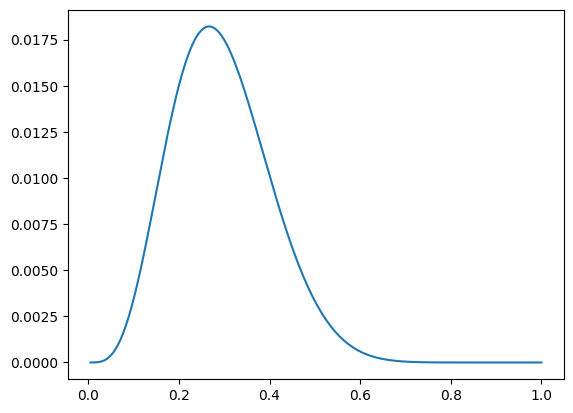

In [1]:
import numpy as np
import seaborn as sns
import scipy

n_grid = 200
n_water = 4
n_land = 11

probabilities = np.cumsum(np.ones(n_grid)) / n_grid

ways = (probabilities ** n_water) * (1 - probabilities) ** n_land

posterior = ways / ways.sum()

sns.lineplot(x=probabilities, y=posterior)

posterior


<AxesSubplot: >

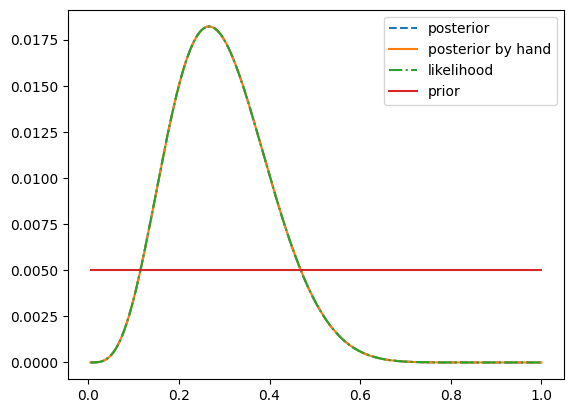

In [2]:
# Using conjugate priors
# Get density of beta distribution
# https://r.amherst.edu/apps/nhorton/Shiny-Bayes/

prior = scipy.stats.beta.pdf(probabilities, 1, 1)
likelihood = scipy.stats.binom.pmf(n_water, n_water + n_land, probabilities)
posterior = scipy.stats.beta.pdf(probabilities, n_water + 1, n_land + 1)
posterior_by_hand = likelihood * prior / (likelihood * prior).sum()


prior = prior / prior.sum()
likelihood = likelihood / likelihood.sum()
posterior = posterior / posterior.sum()
posterior_by_hand = posterior_by_hand / posterior_by_hand.sum()


sns.lineplot(x=probabilities, y=posterior, label='posterior', linestyle='--')
sns.lineplot(x=probabilities, y=posterior_by_hand, label='posterior by hand')
sns.lineplot(x=probabilities, y=likelihood, label='likelihood', linestyle='-.')
sns.lineplot(x=probabilities, y=prior, label='prior')

2. Using the posterior distribution from 1,compute the posterior predictive distribution for the next 5 tosses of the same globe. I recommend you use the sampling method.

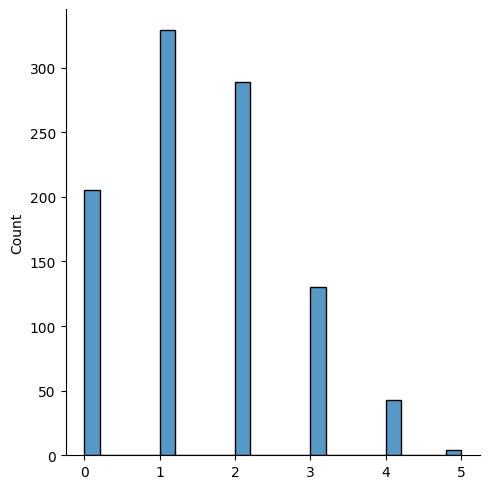

In [3]:
n_samples = 1000

sample_posterior = np.random.choice(
    probabilities,
    p=posterior,
    size=n_samples
)

sample_waters = np.random.binomial(
    n=5,
    p=sample_posterior,
    size=n_samples
)

sns.displot(
    data=sample_waters,
)

3. Use the posterior predictive distribution from 2 to calculate the probability of 3 or more water samples in the next 5 tosses.

In [4]:
(sample_waters >= 3).sum() / len(sample_waters)

0.177

4-OPTIONAL. This problem is an optional challenge for people who are taking the course for a second or third time. Suppose you observe W = 5 water points, but you forgot to write down how many times the globe was tossed, so you don’t know the number of land points L. Assume that p = 0.7 and compute the posterior distribution of the number of tosses N. Hint: Use the binomial distribution.

<AxesSubplot: >

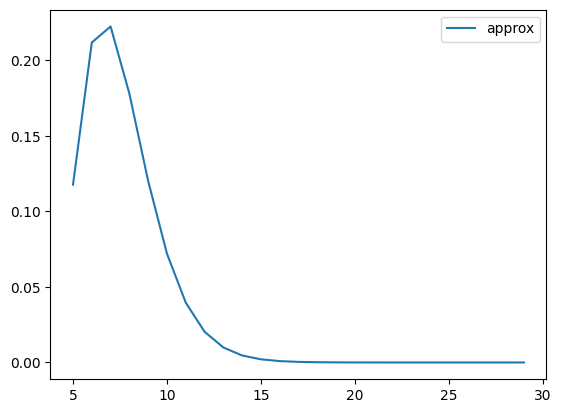

In [5]:
from scipy.special import comb

p = 0.7
n_waters = 5

n = np.arange(5, 30)

posterior = comb(n, n_waters) * (p ** n_waters) * ((1 - p) ** (n - n_waters))
posterior = posterior / posterior.sum()


sns.lineplot(
    x=n, y=posterior, label='approx'
)



In [6]:
posterior

array([1.17649000e-01, 2.11768200e-01, 2.22356610e-01, 1.77885288e-01,
       1.20072570e-01, 7.20435418e-02, 3.96239480e-02, 2.03780304e-02,
       9.93428982e-03, 4.63600191e-03, 2.08620086e-03, 9.10342194e-04,
       3.86895433e-04, 1.60710410e-04, 6.54320957e-05, 2.61728383e-05,
       1.03055551e-05, 4.00098020e-06, 1.53370908e-06, 5.81195019e-07,
       2.17948132e-07, 8.09521634e-08, 2.98051147e-08, 1.08853462e-08,
       3.94593801e-09])